This notebook will specifically use data from the Allen Insitute for Neural Dynamics and show how we can leverage CEBRA to analyse our in-house data.

In [1]:
import sys
import os # my addtion

import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import cebra.data
import torch
import cebra.integrations
import cebra.datasets
from cebra import CEBRA
import torch
import pickle

from matplotlib.collections import LineCollection
import pandas as pd

## Load the Data

In [2]:
pd.__version__

'2.0.0'

In [3]:
#pip install pandas==2.0.0

In [4]:
df_trials_ses = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/data/CO data/df.pkl', "rb"))

In [5]:
df_trials_ses

,bit_code,ses_idx,rpe,left_action_value,right_action_value,licks L,licks R,Lick L (raw),Lick R (raw),trial,...,reward_time,onset,NM,NM_name,region,last_value_NM,overlap_index,NM_no_overlap,bins_mids,bins_mids_no_overlap
0,00110001111001010011,632106_2022-08-23,1.000000,0.000000e+00,0.327773,26.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,...,92.362000,"[-1.0, -0.9500000000000028, -0.900000000000005...","[-0.006876904734641623, -0.007146692736817482,...",DA,NAc,NaN,0,"[-0.006876904734641623, -0.007146692736817482,...","[-0.9750000000000014, -0.9250000000000043, -0....","[91.05000152587891, 91.1000015258789, 91.15000..."
1,10101101011111010011,632106_2022-08-23,-0.327773,0.000000e+00,0.222074,10.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,...,NaN,"[-1.0, -0.9500000000000028, -0.900000000000005...","[0.09396514270492158, 0.09166120346690362, 0.0...",DA,NAc,0.074671,18,"[0.07467145399912882, 0.07390178461889173, 0.0...","[-0.9750000000000014, -0.9250000000000043, -0....","[100.83500366210933, 100.88500366210931, 100.9..."
2,10110000011000010100,632106_2022-08-23,-0.222074,0.000000e+00,0.150461,2.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,...,NaN,"[-1.0, -0.9500000000000028, -0.900000000000005...","[0.03888178725609381, 0.03576014157991385, 0.0...",DA,NAc,0.111702,18,"[0.1117021239456095, 0.1111829908404548, 0.114...","[-0.9750000000000014, -0.9250000000000043, -0....","[108.38499908447261, 108.4349990844726, 108.48..."
3,10111100010010100001,632106_2022-08-23,-0.150461,0.000000e+00,0.101941,2.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,...,NaN,"[-1.0, -0.9500000000000028, -0.900000000000005...","[0.04022817060438801, 0.04426318323498179, 0.0...",DA,NAc,0.039222,19,"[0.039221979243197015, 0.04083176200307425, 0....","[-0.9750000000000014, -0.9250000000000043, -0....","[113.19799957275384, 113.24799957275386, 113.2..."
4,01101111100010011111,632106_2022-08-23,-0.101941,0.000000e+00,0.069068,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,...,NaN,"[-1.0, -0.9500000000000028, -0.900000000000005...","[0.027914873653080343, 0.028333289056160112, 0...",DA,NAc,0.023959,19,"[0.023959280634978056, 0.02501534419509218, 0....","[-0.9750000000000014, -0.9250000000000043, -0....","[117.01500091552728, 117.06500091552729, 117.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,00011101000011111011,632106_2022-08-23,-0.824473,1.198410e-05,0.558602,1.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1754,...,NaN,"[-1.0, -0.9500000000007276, -0.900000000001455...","[-0.0012799915180941783, -0.000190254206188288...",ACh,NAc,0.001646,19,"[0.0016461378021336635, -0.0003314239969927528...","[-0.9750000000003638, -0.9250000000010914, -0....","[10949.811914062486, 10949.861914062485, 10949..."
1761,00000100001000111000,632106_2022-08-23,0.441398,5.779060e-06,0.703280,3.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1755,...,10954.419922,"[-1.0, -0.9500000000007276, -0.900000000001455...","[0.002407675576329689, 0.004578818551264469, 0...",ACh,NAc,0.000260,18,"[0.00026042376397175855, 0.0025022589975745445...","[-0.9750000000003638, -0.9250000000010914, -0....","[10954.139843749987, 10954.189843749986, 10954..."
1762,01011100011001010000,632106_2022-08-23,0.296720,2.786810e-06,0.800537,2.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1756,...,10960.533203,"[-1.0, -0.9500000000007276, -0.900000000001455...","[0.004071718630667636, 0.0019159427498036115, ...",ACh,NAc,0.005961,19,"[0.00596118894201

In [6]:
neural1 = df_trials_ses['NM_no_overlap'][0]
neural1 = neural1.values
neural1.shape

(4,)

In [7]:
df_trials_ses['NM'][0]

0    [-0.006876904734641623, -0.007146692736817482,...
0    [-0.007254084834965805, -0.00836556607672092, ...
0    [-0.01131407397227345, -0.012325788041828246, ...
0    [-0.00012019814795404958, 0.001512433550435516...
Name: NM, dtype: object

In [8]:
df_trials_ses['NM_no_overlap'][0].values.reshape(4,-1)

array([[array([-0.0068769 , -0.00714669, -0.00794731, -0.00581282, -0.00902792,
               -0.00869373, -0.00648039, -0.01133958, -0.01214093, -0.00960585,
               -0.00806713, -0.01065213, -0.01528414, -0.0131726 , -0.01042611,
               -0.01375567, -0.01770758, -0.01824765, -0.01798227, -0.01844706,
               -0.01841321, -0.01157488, -0.00101033, -0.0023625 , -0.00140547,
                0.00315955,  0.00410723,  0.01229033,  0.01741996,  0.01627874,
                0.01916786,  0.02842596,  0.03404841,  0.03889954,  0.04270529,
                0.04262257,  0.04385526,  0.0478446 ,  0.05232376,  0.05445941,
                0.05621895,  0.05724795,  0.05921599,  0.05833227,  0.06015247,
                0.06260454,  0.06290662,  0.06341896,  0.05995672,  0.05881274,
                0.06010302,  0.06051719,  0.05899269,  0.0569561 ,  0.05610979,
                0.05223928,  0.05102352,  0.04943362,  0.04593112,  0.04624867,
                0.04808403,  0.05076842,

In [9]:
neural1.shape

(4,)

In [10]:
neural2 = df_trials_ses['NM_no_overlap'][1]
neural2 = neural2.values
neural2.shape

(4,)

In [11]:
# make a 2D list of the neural data eg.
n1 = np.array([neu for i,neu in enumerate(neural1)])

# and same for trial #2 
n2 = np.array([neu for i,neu in enumerate(neural2)])

In [12]:
print(n1.shape)
print(n2.shape)

(4, 196)
(4, 151)


In [13]:
neural_data = np.zeros((n1.shape[0],n1.shape[1] + n2.shape[1]))
neural_data.shape

(4, 347)

In [14]:
neural_data[:,:n1.shape[1]] = n1
neural_data[:,n1.shape[1]:] = n2

In [15]:
np.sum(neural_data[:,:n1.shape[1]] - n1)

0.0

In [16]:
# make a behavioural label based on whether it was rewarded or not
b_label = np.zeros((1,n1.shape[1] + n2.shape[1]))
b_label.shape

(1, 347)

In [17]:
df_trials_ses['reward'][0]

0    True
0    True
0    True
0    True
Name: reward, dtype: bool

In [18]:
b_label[:,:n1.shape[1]] = 1

In [19]:
np.unique(b_label, return_counts=True)

(array([0., 1.]), array([151, 196]))

## Build and train the CEBRA model

In [20]:
max_iterations = 2000

In [21]:
# build the model
cebra_behavior_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [158]:
int(3e-4)

0

In [22]:
new_neural = np.transpose(neural_data)

In [23]:
new_neural.shape

(347, 4)

In [24]:
behaviour_l = np.transpose(b_label)
labels = behaviour_l.flatten()

In [25]:
labels.shape

(347,)

In [26]:
print('neural data shape:', neural_data.shape)
print('behaviour labels shape:', behaviour_l.shape)

neural data shape: (4, 347)
behaviour labels shape: (347, 1)


In [27]:
np.unique(behaviour_l, return_counts=True)

(array([0., 1.]), array([151, 196]))

In [28]:
# train the model
cebra_behavior_model.fit(new_neural, behaviour_l)

pos: -0.6028 neg:  6.7066 total:  6.1038 temperature:  1.0000: 100%|██████████| 2000/2000 [00:50<00:00, 39.85it/s]


CEBRA(batch_size=512, conditional='time_delta', max_iterations=2000,
      model_architecture='offset10-model', output_dimension=3, temperature=1,
      time_offsets=10, verbose=True)

In [29]:
# produce the embedding
cebra_embedding = cebra_behavior_model.transform(new_neural)

In [30]:
# divide the labels into rewarded and unrewarded
rewarded = behaviour_l==1
unrewarded = behaviour_l==0

In [31]:
rewarded = rewarded.flatten()
unrewarded = unrewarded.flatten()

In [32]:
cebra_embedding.shape

(347, 3)

In [33]:
rewarded.flatten().shape


(347,)

In [34]:
labels[rewarded].shape

(196,)

<Axes3D: title={'center': 'NMs'}>

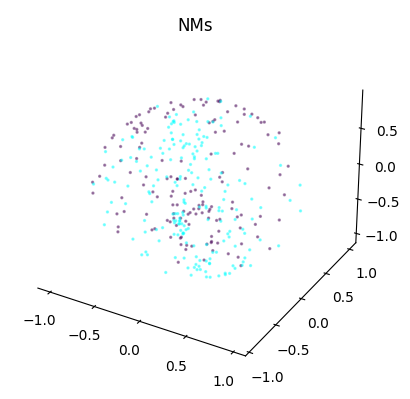

In [35]:
fig = plt.figure()
ax1 = plt.subplot(111, projection = '3d')

cebra.plot_embedding(embedding=cebra_embedding[rewarded,:], embedding_labels=labels[rewarded],ax=ax1, markersize=2, title='NMs', cmap='cool')
cebra.plot_embedding(embedding=cebra_embedding[unrewarded,:], embedding_labels=labels[unrewarded],ax=ax1,markersize=2, title='NMs', cmap='viridis')

Try get this for all trials

In [36]:
traces = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/data/CO data/traces.pkl', "rb"))

In [37]:
all_nms = np.array([traces[trace] for trace in traces.keys()])
all_nms = np.transpose(all_nms)

In [38]:
# data from all 4 NMs across the whole session
all_nms.shape

(218572, 4)

In [39]:
df_trials_ses['NM_no_overlap'].shape

(7060,)

In [40]:
# get behaviour label
t_rewards = df_trials_ses['reward']


In [41]:
t_rewards = t_rewards.to_numpy()

In [42]:
t_rewards[1]

False

In [43]:
all_nms.shape

(218572, 4)

In [44]:
type(df_trials_ses['reward'][0])

pandas.core.series.Series

In [45]:
x = df_trials_ses['reward'][0].to_numpy()

In [46]:
x_all = df_trials_ses['reward']

In [47]:
df_trials_ses.sort_values(['NM_name','trial']).set_index( 'trial')['reward'][:df_trials_ses.trial.max()]

trial
0        True
1       False
2       False
3       False
4       False
        ...  
1747     True
1748    False
1749     True
1750    False
1751     True
Name: reward, Length: 1758, dtype: bool

In [48]:
df_trials_ses['trial']

0          0
1          1
2          2
3          3
4          4
        ... 
1760    1754
1761    1755
1762    1756
1763    1757
1764    1758
Name: trial, Length: 7060, dtype: int64

In [49]:
df_trials_ses.sort_values(['NM_name','trial']).set_index( 'trial')['reward']

trial
0        True
1       False
2       False
3       False
4       False
        ...  
1754    False
1755     True
1756     True
1757    False
1758    False
Name: reward, Length: 7060, dtype: bool

In [95]:
n_trials = df_trials_ses['reward'].index.max() + 1
n_trials

1765

In [50]:
# Reward labels for the whole session -  trial scale
s1_ = df_trials_ses['reward'].iloc[:1765] 

In [67]:
a = np.arange(0,10)
b = np.arange(10,20)
c = np.concatenate([a,b])
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [81]:
d = [a,b]
type(d)

list

In [82]:
np.concatenate(d)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [72]:
np.zeros(5).astype(np.bool_)

array([False, False, False, False, False])

In [86]:
df_trials_ses['NM_no_overlap'].iloc[0].shape[0]

196

In [97]:
j = 0
for i in range(0,5):
    print(i)


0
1
2
3
4


0

In [100]:
df_trials_ses['NM_no_overlap'].iloc[:1765].shape

(1765,)

In [101]:
# loop over all the trials

# create a list to hold the individual trial labels
all_labels = []

# at each trial,
for i in range(0,n_trials):

    # get the number of timesteps in the trial
    n_timesteps  = df_trials_ses['NM_no_overlap'].iloc[i].shape[0]


    # make a boolean array/list indicating each of the timesteps as True(rewarded)/False(unrewarded)
    if df_trials_ses['reward'].iloc[i] == True:
        trial_label = np.ones(n_timesteps).astype(np.bool_)

    elif df_trials_ses['reward'].iloc[i] == False:
        trial_label = np.zeros(n_timesteps).astype(np.bool_)
    

    # append the boolean array to the list of trial labels
    all_labels.append(trial_label)

# concatenate the list of arrays containing the trial labels -- timesteps scale
labels = np.concatenate(all_labels)

# compare the length of the label and the neural data
print('length of labels', labels.shape)
print('shape of neural data', all_nms.shape)



length of labels (218572,)
shape of neural data (218572, 4)


In [111]:
# check for random timesteps and see if it's actually the correct reward labels used
np.unique(labels[196:347], return_counts=True)

(array([False]), array([151]))

In [114]:
labels.flatten().shape

(218572,)

In [120]:
all_nms_new = all_nms.astype(np.float64)

In [125]:
all_nms_new.shape

(218572, 4)

In [128]:
all_nms_tensor = torch.from_numpy(all_nms_new)
all_nms_tensor.shape

torch.Size([218572, 4])

In [134]:
# build the model
cebra_behavior_model_1 = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [136]:
# train the model
cebra_behavior_model_1.fit(all_nms_tensor,labels)

pos: -0.8921 neg:  6.4182 total:  5.5261 temperature:  1.0000: 100%|██████████| 2000/2000 [00:51<00:00, 39.10it/s]


CEBRA(batch_size=512, conditional='time_delta', max_iterations=2000,
      model_architecture='offset10-model', output_dimension=3, temperature=1,
      time_offsets=10, verbose=True)

In [137]:
# compute the embedding
cebra_embedding_1 = cebra_behavior_model_1.transform(all_nms_tensor)

In [142]:
np.unique(labels)

array([False,  True])

In [143]:
# divide the labels into rewarded and unrewarded
rewarded_ = labels==True
unrewarded_ = labels==False

rewarded_ = rewarded_.flatten()
unrewarded_ = unrewarded_.flatten()

In [150]:
np.unique(unrewarded_, return_counts=True)

(array([False,  True]), array([ 80450, 138122]))

In [151]:
cebra_embedding_1.shape

(218572, 3)

<Axes3D: title={'center': 'NMs'}>

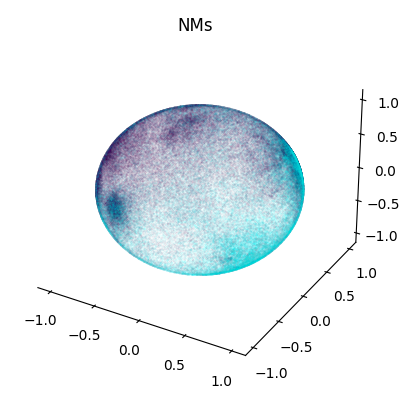

In [155]:
fig1 = plt.figure()
ax2 = plt.subplot(111, projection = '3d')

cebra.plot_embedding(embedding=cebra_embedding_1[rewarded_,:], embedding_labels=labels[rewarded_],ax=ax2, markersize=0.001, title='NMs', cmap='cool')
cebra.plot_embedding(embedding=cebra_embedding_1[unrewarded_,:], embedding_labels=labels[unrewarded_],ax=ax2,markersize=0.001, title='NMs', cmap='viridis')

If this is correct, there should be a clear clustering of the rewarded (cool/light blue) vs the unrewarded (viridis/purple) trials.

In [ ]:
def base_embed(input, b_label=None, temp=1, dimension=3, lr = 3e-4, d=0.1, mode='time_delta', iters = 2000):

    # build CEBRA time model
    model = CEBRA(model_architecture='offset10-model',
                         batch_size=512,
                         learning_rate=lr,
                         temperature=int(temp),
                         output_dimension = int(dimension),
                         max_iterations=int(iters),
                         distance='cosine',
                         delta=int(d),
                         conditional=mode,
                         device='cuda_if_available',
                         time_offsets=10)
    
    # train using label if it's a behaviour model
    train_size = int(input.shape[0])

    if mode == 'time':
        model.fit(input[:train_size])
    if mode == 'delta':
        model.fit(input[:train_size],b_label[:train_size])

    embedding = model.transform(input)
    return model, embedding

In [ ]:
# make multiple embeddings and see if they change